<a href="https://colab.research.google.com/github/LindseyShantanu/AI-ML-Dev/blob/main/A_Star_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [ ]:
import numpy as np
import cv2
import urllib
import math
from google.colab.patches import cv2_imshow

#Image Setup

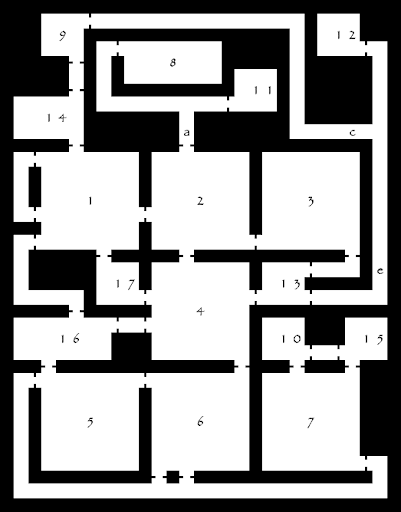

In [ ]:
url = "https://drive.google.com/uc?export=download&id=14W621LeT1pWo6AiH3wywIqLT7k_IcZQQ"
data = urllib.request.urlopen(url)
arr = np.asarray(bytearray(data.read()), dtype=np.uint8)
img = cv2.imdecode(arr, cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)


In [ ]:
np.set_printoptions(threshold=10000, linewidth=300)
map = cv2.resize(img, (50,64))
x, map = cv2.threshold(map, 10, 255, cv2.THRESH_BINARY)
print(map)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255   0 255 255 255 255 255 255   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255   0 255 255 255 255 255 255   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255   0 255 255 255 255 255 255   0   

#Cost Functions


As we saw in the previous A* implementation, we need a heuristic to calculate the cost to move from one square to another. The cost function is:

$f(n)=g(n)+h(n)$

There are multiple ways for us to calculate distance in our cost function. The main goal is that we want a distance calculation that is accurate and will not exceed the actual distance to travel from one square to another on the grid. There are three formulas we can use: Euclidean, Manhattan, and Octile distance.

###Euclidean distance
The Euclidean distance formula should be familiar to anyone who has taken geometry:

$A^2+B^2=C^2$

On a coordinate grid, we can rewrite this as

$(x1−x2)^2+(y1−y2)^2=distance^2$

This gives us the direct line distance from one square to another on our grid.

###Manhattan distance
Manhattan distance assumes only horizontal and vertical movement and can be calculated with the following formula:

$|x1−x2|+|y1−y2|=distance$

This formula will provide a more accurate distance measurement if our agent can only move in four directions.

###Octile distance
Octile distance is a variation of Manhattan distance that allows for eight directions of movement instead of four. For our simple grid, this can be calculated as follows:
$|x1−x2|+|y1−y2|+(√(2)−2)∗minimum|x1−x2|or|y1−y2|$

In [ ]:
def ManhattanDist(pos1, pos2):
  return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

def EuclideanDist(pos1, pos2):
  return math.sqrt((pos1[0] - pos2[0])**2 + (pos1[1] - pos2[1])**2)

def OctileDist(pos1, pos2):
  dx = abs(pos1[0] - pos2[0])
  dy = abs(pos1[1] - pos2[1])
  return (dx + dy) + (math.sqrt(2) - 2) * min(dx, dy)

#A*Algorithm


In [ ]:
def AStarSearch(map, start, goal, costFunc):
    seen = [start]
    gn = {str(start):0}
    parent = {str(start): None}


    while seen:
        current = []
        current_f = float('inf')
        for node in seen:
            if gn[str(node)] + costFunc(node, goal) < current_f:
                current = node
                current_f = gn[str(node)] + costFunc(node, goal)
        seen.remove(current)

        if current == goal:
            path = [goal]
            map[goal[1]][goal[0]] = 99
            node = str(goal)
            while node != str(start):
                path.append(parent[node])
                map[parent[node][1]][parent[node][0]] = 99
                node = str(parent[node])
            path.reverse()

            return gn[str(goal)]

        for y in range(-1, 2, 1):
            for x in range(-1, 2, 1):
                xp = current[0] + x
                yp = current[1] + y
                if (yp < map.shape[0] and yp > 0) and (xp < map.shape[1] and xp > 0) and map[yp][xp] != 0:
                    neighbor_g = 0
                    if x == 0 or y == 0:
                        neighbor_g = gn[str(current)] + 1
                    else:
                        neighbor_g = gn[str(current)] + math.sqrt(2)
                    if str([xp, yp]) not in gn.keys() or gn[str([xp, yp])] > neighbor_g:
                        gn[str([xp, yp])] = neighbor_g
                        parent[str([xp, yp])] = current
                        if [xp, yp] not in seen:
                            seen.append([xp, yp])

    return None

#Execute

88.18376618407355


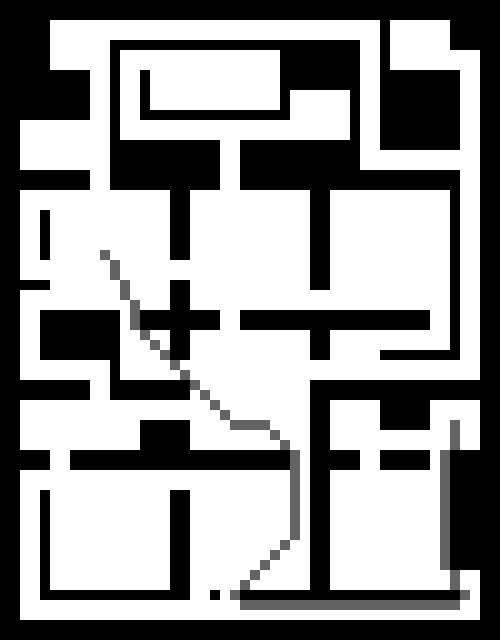

In [ ]:
start = [10, 25]
goal = [45, 42]
path = AStarSearch(map, start, goal, ManhattanDist)
print(path)
map = cv2.resize(map, (500,640), interpolation=0)
cv2_imshow(map)